# Pràctica 1 - Regressió
[github grup 305](https://github.com/Itziar01/-ApC-Practica-1---Regressio) 

## Apartat (C): Analitzant Dades

Ens trobem dabant d'una base de dades respecte les **carcteristiques del formigó**, on trobem tant la seva **composició**, **edat de vida** i l'**esforç** que es capaç d'aguantar, sent aquest últim potser el que té més interés. Analitzarem més en profunditat aquestes dades per veure en profunditat les característiques de la base de dades.

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Definim veure només els 2 primers decimals de les mostres
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Funció per llegir dades d'un csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carregem la base de dades
dataset = load_dataset('Concrete_Data_Yeh.csv')
data = dataset.values

x = data[:, :2]
y = data[:, 2]

print("Forma de la base de dades:", dataset.shape)
print("Dimensions de la entrada x:", x.shape)
print("Dimensió dels atributs y:", y.shape)

Forma de la base de dades: (1030, 9)
Dimensions de la entrada x: (1030, 2)
Dimensió dels atributs y: (1030,)


Les etiquetes que ens indiquen les entrades son les que es poden veure a continuació:

In [2]:
print ('Etiquetes:', dataset.keys())

Etiquetes: Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')


Per començar a treballar amb aquest conjunt de dades, ens interessa saber quines variables poden tenir valors no existents. Podem observar que no hi ha cap valor nul en les mostres:

In [3]:
print(dataset.isnull().sum())

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


A continuació, vuerem el tipus de dades que podem trobar dins de cada atribut.

In [4]:
dataset.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.00,0.00,0.00,162.00,2.50,1040.00,676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,1055.00,676.00,28,61.89
2,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270,40.27
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365,41.05
4,198.60,132.40,0.00,192.00,0.00,978.40,825.50,360,44.30


In [5]:
dataset.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.45
75%,350.00,142.95,118.30,192.00,10.20,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


Una vegada ja ens hem començat a familiaritzar amb les dades, pasem a veure quines són les caracteristiques de les variables i la seva relació amb els altres atributs de la bade de dades.

<IPython.core.display.Javascript object>


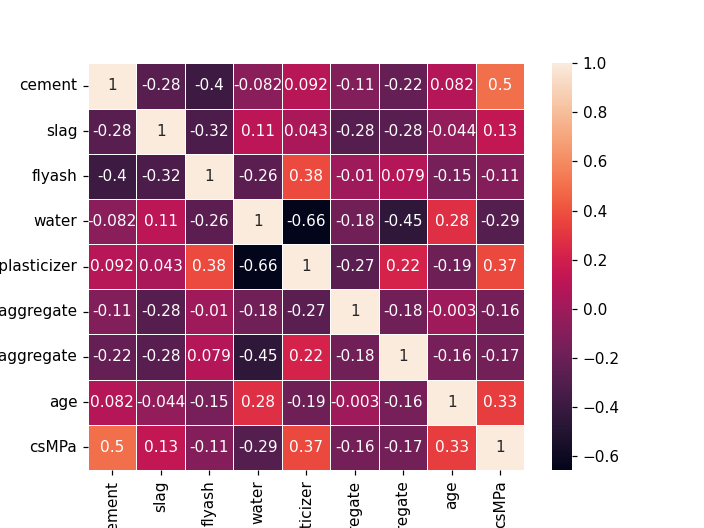

In [6]:
import seaborn as sns
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

<IPython.core.display.Javascript object>


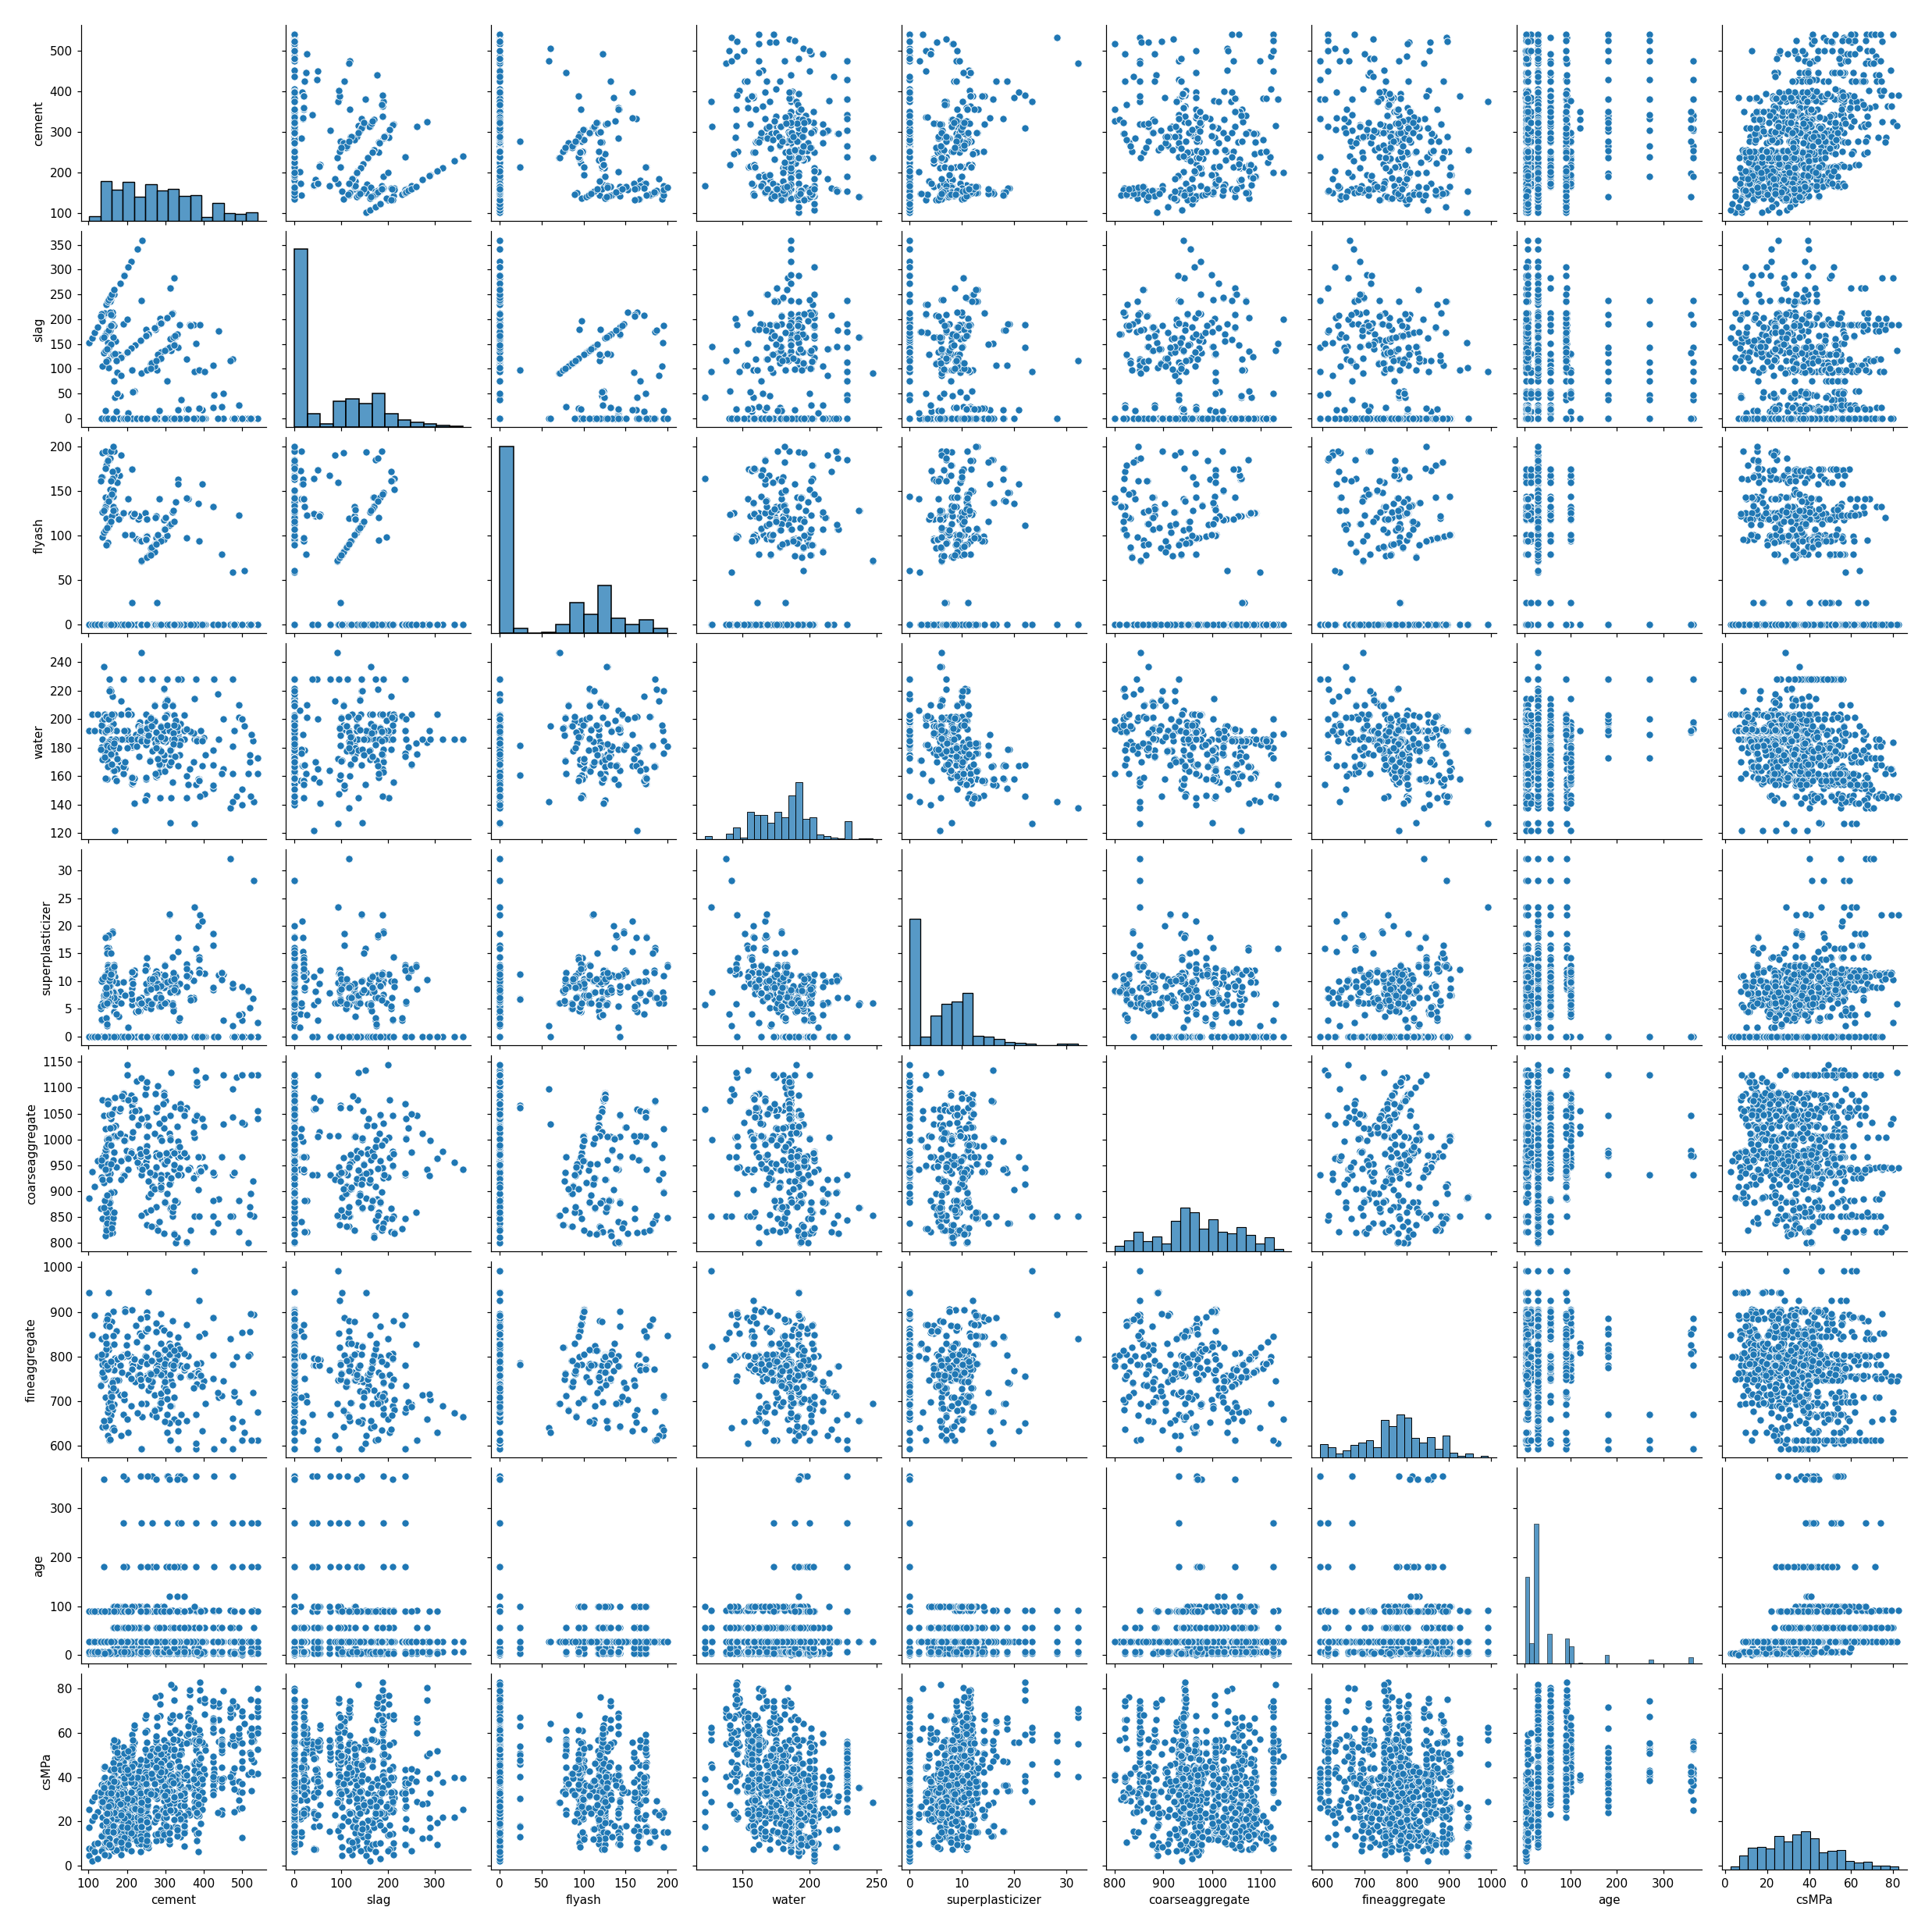

In [7]:
relacio = sns.pairplot(dataset)

Les conclusions que n'extraiem d'aquest petit anàlisin són les següents:

Cadascun atribut representa les característiques del formigó (intervals \[ \])
- cement: kg per cada $m^3$ de la barreja. La distrivució es troba principalment al primer i segon rang del interval. \[102, 504\] (double)
- blast furnace slag: kg per cada $m^3$ de la barreja. Trobem un volum important en el valor del 0, cosa que ens indica que hi ha moltes mostres que no conten aquest element. \[0, 359.4\] (double) 
- fly ash: kg per cada $m^3$ de la barreja. Trobem que més de la metitat de les mostres és 0. \[0, 210\] (double) 
- water: kg per cada $m^3$ de la barreja. Podem veure una distrivució semblan a una campana de Gauss, tot no cumplir-se del tot, tot i així, la seva concentració és bastant central. \[121.8, 247\] (double)
- superplasticizer: kg per cada $m^3$ de la barreja. Trobem un volum important en el valor del 0, cosa que ens indica que hi ha moltes mostres que no conten aquest element. \[0, 32.2\] (double) 
- coarse aggregate: kg per cada $m^3$ de la barreja. És una mostra bastant similar a una campana de Gauss. \[801, 1145\] (double)
- fine aggregate: kg per cada $m^3$ de la barreja.  És una mostra bastant similar a una campana de Gauss. \[594, 992.5\] (double)
- age: edat en dies. Els valors són bastant dispersos, no presentan cap caracteristiqua més enllà de que la majoria estan present en els 7 primers dies. \[1, 365\] (int)
- csMPa/compresive strength: força de compressió en MPa.  És una mostra bastant similar a una campana de Gauss. \[2.33, 82.6\] (double)

La força de compressió que és capaç d'aguantar el formigó és la que procederem a entrenar i predir en funció dels matrials que estan composats.

## Apartat (B): Primeres regressions 

Comencem inician una funció que ens dona l'error quadratic mitjà entre dos atributs.

In [8]:
import math

def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

Important estandaritzar també els valors que tenim abans de procesar les dades per tenir una homogenieitat dins de les comparacions. Així afegim aquesta funció:

In [9]:
from sklearn.linear_model import LinearRegression

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

In [10]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

In [11]:
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

In [12]:
from sklearn.metrics import r2_score, mean_squared_error as mse

# Dividim dades d'entrenament
x = data[:, :-1]
y = data[:, -1]

x_train, y_train, x_val, y_val = split_data(x, y)

for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))  

    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    print(f"Atribut {i}")
    print("MSE: %f" %(error))
    print("R2: %f" %(r2), end="\n\n")

Atribut 0
MSE: 187.806173
R2: 0.268302

Atribut 1
MSE: 255.548429
R2: 0.004376

Atribut 2
MSE: 257.512378
R2: -0.003275

Atribut 3
MSE: 234.013017
R2: 0.088279

Atribut 4
MSE: 220.823607
R2: 0.139665

Atribut 5
MSE: 253.560700
R2: 0.012121

Atribut 6
MSE: 246.870996
R2: 0.038184

Atribut 7
MSE: 234.842748
R2: 0.085046



Aquí podem observar els diferents valors de R2 score i MSE que obtenim al fer una regresió només amb un dels 8 atributs disponibles, com podem veure, l'error més baix s'assoleix amb l'atribut 0 (cement), ja que és el que té més correlació.

In [13]:
# WITH ALL VARIABLES: 

regr = regression(x_train, y_train)
error = mse(y_val, regr.predict(x_val))
r2 = r2_score(y_val, regr.predict(x_val))

print("WITH ALL VARIABLES")
print(f"MSE: {error}")
print(f"r2:  {r2}", end="\n\n")

# MORE THAN 0.2 ABS CORRELATION

x_train1 = np.delete(x_train, [1, 2, 5, 6], axis=1)
x_val1 = np.delete(x_val, [1, 2, 5, 6], axis=1)

regr = regression(x_train1, y_train)
error = mse(y_val, regr.predict(x_val1))
r2 = r2_score(y_val, regr.predict(x_val1))

print("VARIABLES WITH MORE THAN 0.2 ABS CORRELATION")
print(f"MSE: {error}")
print(f"r2:  {r2}", end="\n\n")

# MORE THAN 0.15 ABS CORRELATION

x_train2 = np.delete(x_train, [1, 2], axis=1)
x_val2 = np.delete(x_val, [1, 2], axis=1)

regr = regression(x_train2, y_train)
error = mse(y_val, regr.predict(x_val2))
r2 = r2_score(y_val, regr.predict(x_val2))

print("VARIABLES WITH MORE THAN 0.15 ABS CORRELATION")
print(f"MSE: {error}")
print(f"r2:  {r2}", end="\n\n")

# NEGATIVE CORRELATION

x_train3 = np.delete(x_train, [2, 3, 5, 6], axis=1)
x_val3 = np.delete(x_val, [2, 3, 5, 6], axis=1)

regr = regression(x_train2, y_train)
error = mse(y_val, regr.predict(x_val2))
r2 = r2_score(y_val, regr.predict(x_val2))

print("VARIABLES NEGATIVE CORRELATION")
print(f"MSE: {error}")
print(f"r2:  {r2}", end="\n\n")

WITH ALL VARIABLES
MSE: 101.08885368434537
r2:  0.6061550890519403

VARIABLES WITH MORE THAN 0.2 ABS CORRELATION
MSE: 124.77929915161288
r2:  0.5138564720895763

VARIABLES WITH MORE THAN 0.15 ABS CORRELATION
MSE: 111.99485682387937
r2:  0.5636650055388635

VARIABLES NEGATIVE CORRELATION
MSE: 111.99485682387937
r2:  0.5636650055388635



Aqui estem mirant si és possible descartar els atributs que tenen menor correlació amb l'atribut objectiu, comprovem que fins i tot els que tenen menor correlació ajuden a tenir uns resultats més fiables.

In [17]:
# WITH ALL VARIABLES: 

regr = regression(x_train, y_train)
error = mse(y_val, regr.predict(x_val))
r2 = r2_score(y_val, regr.predict(x_val))

print("WITH ALL VARIABLES")
print(f"MSE: {error}")
print(f"r2:  {r2}", end="\n\n")

# WITHOUT I COLUMN

for i in range(x_train.shape[1]):

    x_train_i = np.delete(x_train, [i], axis=1)
    x_val_i = np.delete(x_val, [i], axis=1)
    
    regr = regression(x_train_i, y_train)
    error = mse(y_val, regr.predict(x_val_i))
    r2 = r2_score(y_val, regr.predict(x_val_i))

    print(f"WITHOUT {i}:")
    print(f"MSE: {error}")
    print(f"r2:  {r2}", end="\n\n")


WITH ALL VARIABLES
MSE: 101.08885368434537
r2:  0.6061550890519403

WITHOUT 0:
MSE: 118.60709572723064
r2:  0.5379035437441793

WITHOUT 1:
MSE: 109.48640328092746
r2:  0.5734380084589097

WITHOUT 2:
MSE: 103.55709382173906
r2:  0.5965387586487318

WITHOUT 3:
MSE: 102.65606308258366
r2:  0.6000491988040056

WITHOUT 4:
MSE: 102.91156399167258
r2:  0.599053760344475

WITHOUT 5:
MSE: 101.50385352325304
r2:  0.6045382384433813

WITHOUT 6:
MSE: 101.47004476691446
r2:  0.6046699582734529

WITHOUT 7:
MSE: 135.31089669648182
r2:  0.4728250829103947



Fen una regresió lineal amb tots els atributs disponibles i després ho tornem a fer treient cada vegada un per veure si hi ha algun que no afecti molt als resultats, veiem que el 4, 5 i 6 no augmenten molt l'error.

In [15]:
x_train_i = np.delete(x_train, [6, 5], axis=1)
x_val_i = np.delete(x_val, [6, 5], axis=1)
    
regr = regression(x_train_i, y_train)
error = mse(y_val, regr.predict(x_val_i))
r2 = r2_score(y_val, regr.predict(x_val_i))

print(f"WITHOUT 5 AND 6:")
print(f"MSE: {error}")
print(f"r2:  {r2}", end="\n\n")

x_train_i = np.delete(x_train, [4, 6, 5], axis=1)
x_val_i = np.delete(x_val, [4, 6, 5], axis=1)
    
regr = regression(x_train_i, y_train)
error = mse(y_val, regr.predict(x_val_i))
r2 = r2_score(y_val, regr.predict(x_val_i))

print(f"WITHOUT 4, 5 AND 6:")
print(f"MSE: {error}")
print(f"r2:  {r2}")

WITHOUT 5 AND 6:
MSE: 101.52278488063484
r2:  0.6044644813624529

WITHOUT 4, 5 AND 6:
MSE: 103.12620495703419
r2:  0.598217513331994


Probem quins serien els resultats de fer la regresió sense els atributs mencionats anteriorment, primer el 5 i 6 i després el 4, 5 i 6.
Podem obserbar que no augmenta l'error encara que treiem els tres i, això ens porta un benefici bastant gran a l'hora d'estalviar-nos espai a canvi d'un agument minim en l'error.

In [16]:
import time

# WITH ALL VARIABLES: 

#print(x_train)
#print(x_val)

x_train_standarized = standarize(x_train)
x_val_standarized = standarize(x_val)

#print(x_train_standarized)
#print(x_val_standarized)

t0 = time.time()

regr = regression(x_train, y_train)
error = mse(y_val, regr.predict(x_val))
r2 = r2_score(y_val, regr.predict(x_val))

print("NOT STANDARIZED")
print(f"MSE: {error}")
print(f"r2:  {r2}")
print(f"Ended in {time.time()-t0}s", end="\n\n")

t0 = time.time()

regr = regression(x_train_standarized, y_train)
error = mse(y_val, regr.predict(x_val_standarized))
r2 = r2_score(y_val, regr.predict(x_val_standarized))

print("STANDARIZED")
print(f"MSE: {error}")
print(f"r2:  {r2}")
print(f"Ended in {time.time()-t0}s")

NOT STANDARIZED
MSE: 101.08885368434537
r2:  0.6061550890519403
Ended in 0.0029904842376708984s

STANDARIZED
MSE: 103.11169667028031
r2:  0.5982740380100009
Ended in 0.001994609832763672s


Finalment fem la prova d'estandaritzar els atributs, com podem observar no hi ha una diferencia significativa en l'error ni en el temps que es tarda en fer l'entrenament i la predicció.

Com a conclusió hem pogut extreure:
Després de realitzar un estudi més detallat fent diferents proves podem veure que els millors valors per fer una bona predicció a traves de la correlació són: cement, water, plasticizer i age. On el mes important d’aquest seria l’atribut cement amb un 0,5 de correlació amb l’atribut objectiu, això, concorda amb que també és l’atribut on s’assoleix un MSE menor amb un valor de 0,22.  Per la resta de resultats en la correlació veiem amb l’atribut slag tenim un valor de 0.13, amb flyash 0.11, water obtenim un resultat de 0.29, plasticizer veiem un valor de 0.37, 0.16 i 0,17 en coarse aggregate i fine aggregate i per últim obtenim un resultat de 0.33 en age.

En el que correspon a la normalització en la regressió observem que no influeix molt, solament s'augmenta en 0.002 la R2 score, creiem que això és degut a que els atributs més importants per fer la predicció tenen valors bastant similars entre ells. Quan fem un filtratge del atributs que no contenen informació no aconseguim millorar ni R2 score ni el MSE, es més aquest dos valors empitjoren quan fem aquest filtratge. Finalment si apliquem PCA trobem que si eliminem els atributs 4 (superplasticizer), 5 (coarseaggregate) i 6 (fineaggregate) quasi no varia el valor del MSE. Hem interpretat que aquests valors no són necessaris a l'hora de predir l'atribut 8 (csMPa, compressive strength).